In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.filters import sobel
from skimage.morphology import binary_closing, binary_opening
from skimage import color
from skimage.draw import circle_perimeter
import os

## Armazena as contagens manuais feitas por Helena e Rafael em um Dataframe 

In [185]:
contagem_manual = [
    {
        'imagem': 'imagem_01',
        'helena': 5,
        'rafael': 5
    },
    {
        'imagem': 'imagem_02',
        'helena': 4,
        'rafael': 3
    },
    {
        'imagem': 'imagem_03',
        'helena': 6,
        'rafael': 5
    },
    {
        'imagem': 'imagem_04',
        'helena': 2,
        'rafael': 1
    },
    {
        'imagem': 'imagem_05',
        'helena': 10,
        'rafael': 8
    },
    {
        'imagem': 'imagem_06',
        'helena': 9,
        'rafael': 8
    },
    {
        'imagem': 'imagem_07',
        'helena': 6,
        'rafael': 6
    },
    {
        'imagem': 'imagem_08',
        'helena': 5,
        'rafael': 5
    },
    {
        'imagem': 'imagem_09',
        'helena': 8,
        'rafael': 8
    },
    {
        'imagem': 'imagem_10',
        'helena': 5,
        'rafael': 4
    }
]

contagem_manual_df = pd.DataFrame(contagem_manual)
print(contagem_manual_df)

      imagem  helena  rafael
0  imagem_01       5       5
1  imagem_02       4       3
2  imagem_03       6       5
3  imagem_04       1       1
4  imagem_05      10       8
5  imagem_06       9       8
6  imagem_07       6       6
7  imagem_08       5       5
8  imagem_09       8       8
9  imagem_10       5       4


## Carrega os arquivos (imagens) da pasta Data 

In [186]:
imagem_01 = io.imread('Data/imagem-01.jpg')
imagem_02 = io.imread('Data/imagem-02.jpg')
imagem_03 = io.imread('Data/imagem-03.jpg')
imagem_04 = io.imread('Data/imagem-04.jpg')
imagem_05 = io.imread('Data/imagem-05.jpg')
imagem_06 = io.imread('Data/imagem-06.jpg')
imagem_07 = io.imread('Data/imagem-07.jpg')
imagem_08 = io.imread('Data/imagem-08.jpg')
imagem_09 = io.imread('Data/imagem-09.jpg')
imagem_10 = io.imread('Data/imagem-10.jpg')

## Armazena as imagens em uma lista

In [187]:
imagens_list = [
    imagem_01,
    imagem_02,
    imagem_03,
    imagem_04,
    imagem_05,
    imagem_06,
    imagem_07,
    imagem_08,
    imagem_09,
    imagem_10
]

## Converte as imagens em escala de cinza

In [188]:
# Lista que armazena as imagens em escala de cinza
imagens_cinza_list = [color.rgb2gray(imagem) for imagem in imagens_list]

## Binariza as imagens

In [189]:
# Lista que armazena as imagens binárias
imagens_binarias_list = []

for imagem in imagens_cinza_list:
    imagem_binaria = imagem.copy()

    limiar = imagem.max()*(110/256)
    imagem_binaria[imagem_binaria<=limiar]=0
    imagem_binaria[imagem_binaria>0]=1

    imagens_binarias_list.append(imagem_binaria)

## Realiza operações de abertura e fechamento

In [190]:
# Lista que armazena as imagens refinadas com as operações morfológicas
imagens_refinadas_list = []

for imagem in imagens_binarias_list:
    imagem_refinada = imagem.copy()

    imagem_refinada = binary_opening(imagem_refinada)
    imagem_refinada = binary_closing(imagem_refinada)

    imagens_refinadas_list.append(imagem_refinada)

## Aplica Sobel para detectar as bordas

In [191]:
# Lista que armazena bordas das imagens
bordas_list = [sobel(imagem) for imagem in imagens_refinadas_list]

## Aplica transformada Hough circular para detectar círculos

In [192]:
# Define que iremos detectar círculos com raio variando entre 5 e 50 
raios = np.arange (5,50,2)

# Lista que armazena a acumulação dos parâmetros
grades_list = []

for imagem in bordas_list:
    hough_grade = hough_circle(imagem, raios)
    grades_list.append(hough_grade)

## Aplica hough_circle_peaks para encontrar os picos

#### Cria a função 'desenha_figura()' para salvar uma imagem na pasta 'Resultados'

In [193]:
caminho_da_pasta = 'Resultados'

# Desenha a figura com os círculos detectados em verde
def desenha_figura(imagem, index):
    # As coordenadas dos centros dos círculos detectados são armazenadas em 'a' e 'b'
    acumuladores, a, b, raio = hough_circle_peaks(grades_list[index], raios, total_num_peaks=10)

    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 6))
    imagem_final = imagem

    for centro_y, centro_x, raio_ in zip(b, a, raio):
        circy, circx = circle_perimeter(centro_y, centro_x, raio_, shape=imagem.shape)
        imagem_final[circy, circx] = (20, 220, 20)

    ax.imshow(imagem_final, cmap=plt.cm.gray)   

    # Nome do arquivo a ser salvo
    nome_do_arquivo = f"resultado_{index+1}.png"


    # Caso o diretório não exista, cria ele
    if not os.path.exists(caminho_da_pasta):
        os.makedirs(caminho_da_pasta)

    # Salva a imagem 
    plt.savefig(os.path.join(caminho_da_pasta, nome_do_arquivo))

    # Mostra a imagem
    plt.show()

#### Aplica 'desenha_figura()' em todas as imagens para obter os resultados

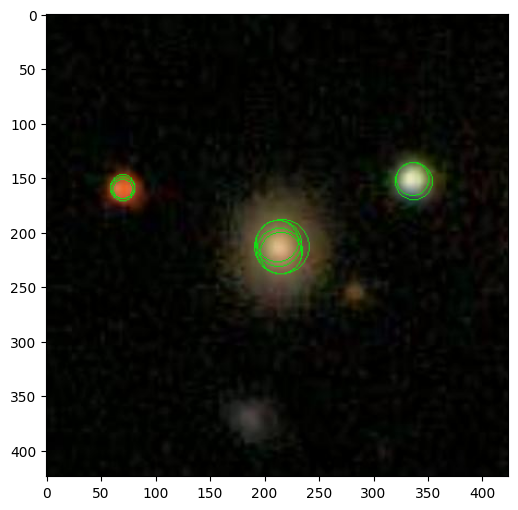

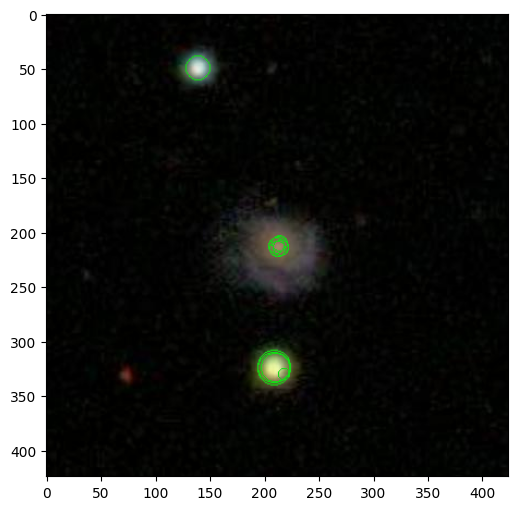

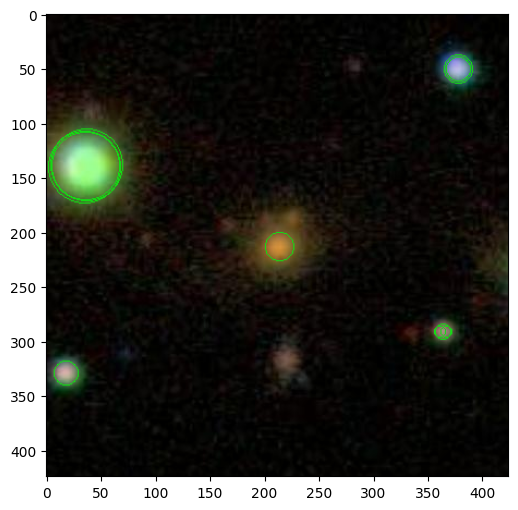

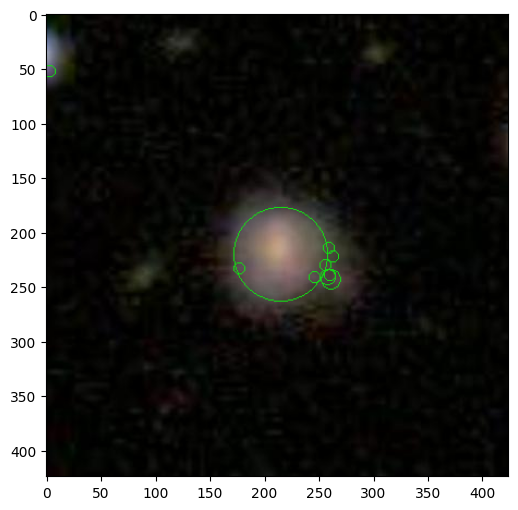

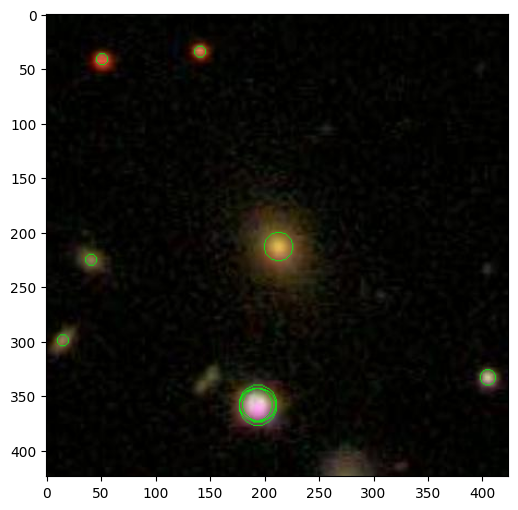

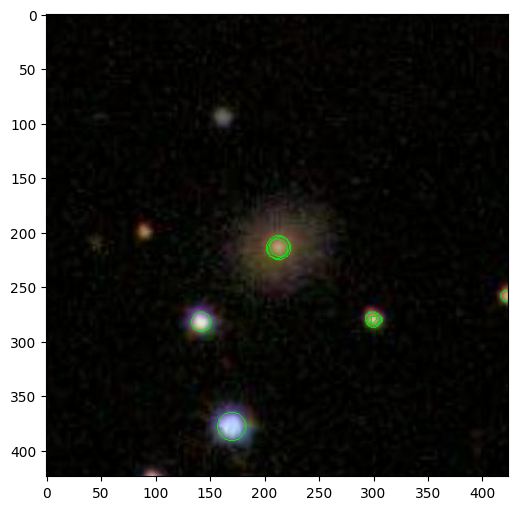

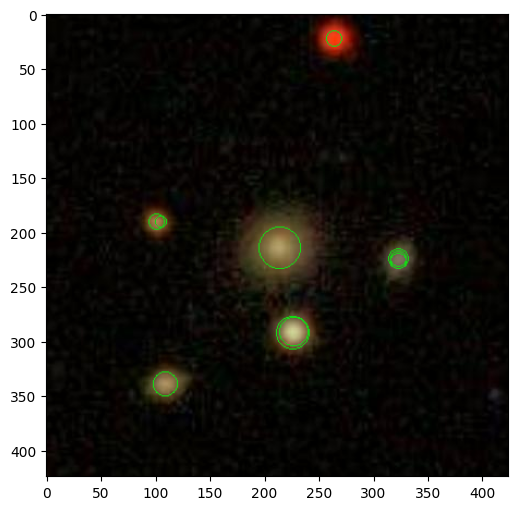

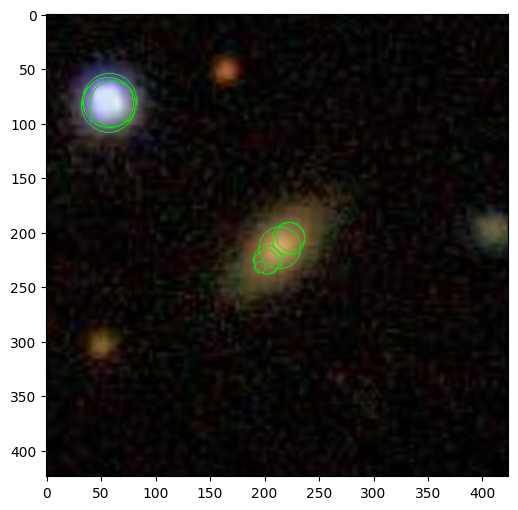

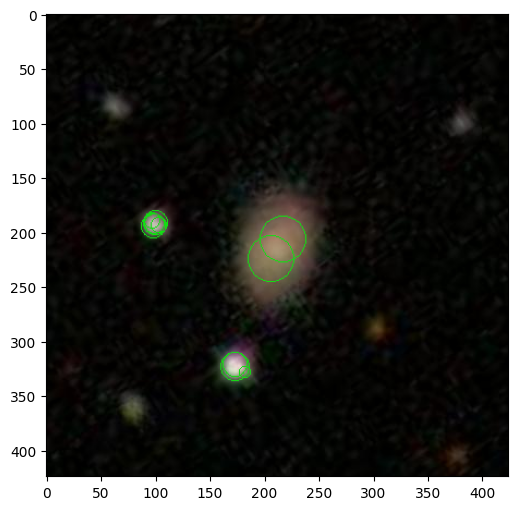

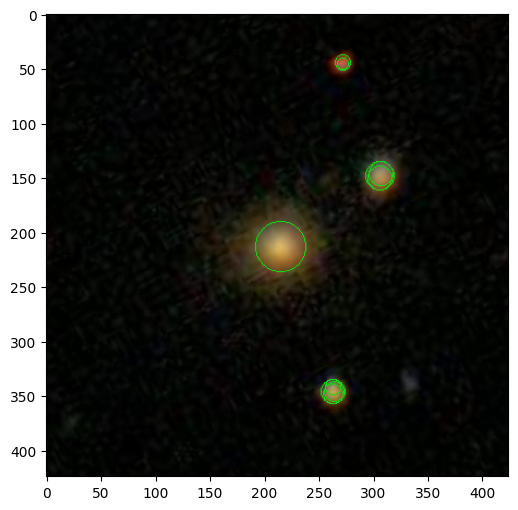

In [194]:
# index para uma imagem de 'imagens_list' poder referenciar o item respectivo em 'grades_list'
i = 0

for imagem in imagens_list:
    desenha_figura(imagem, i)
    i += 1